# 1. CharacterTextSplitter
- `\n\n` 기준으로 텍스트를 분할 (즉, 문단을 기준으로 분할됨)
    - 문장을 기준으로 분할학 싶을 경우: `\n`사용
- 문자 수로 청크 크기 결정 
- 즉, 
    - 지정된 chunk_size 이내에서 `\n\n`를 찾은 후 `\n\n`를 발견하면 `\n\n`를 기준으로 자름  
    - 예를 들어 chunk_size가 100인데 93글자 쯤에서 `\n\n`를 발견하면 그 부분을 기준으로 chunk를 자름 
    - 근데 만약 chunk_size를 넘겨서 `\n\n`를 발견하여 자를 경우 자르긴 자르지만 경고문자가 뜸 

## 1.1 Document(pdf같은..) 로드 했을 경우

1. Document로드
    - pdf로더로 문서를 로드할 경우 문서 타입이 Document객체임 -> splitter에서 split_document()를 써야함 

In [4]:
from dotenv import load_dotenv

load_dotenv()

True

1. Document 로드

In [4]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader('SW중심사회 9월호.pdf')
docs = loader.load()

2. splitter 객체 생성

In [6]:
from langchain_text_splitters import CharacterTextSplitter

splitter = CharacterTextSplitter(
    separator='\n',
    chunk_size=700,
    chunk_overlap=0,
    length_function=len, # chunk 기준을 len()를 통해 글자수를 파악하여 split 하겠다
    is_separator_regex=False, # 구분자가 정규표현식인지 아닌지 설정
)

split_docs = splitter.split_documents(docs)

print(type(split_docs))
print(len(split_docs))
split_docs[0]

<class 'list'>
163


Document(metadata={'source': 'SW중심사회 9월호.pdf', 'file_path': 'SW중심사회 9월호.pdf', 'page': 0, 'total_pages': 78, 'CreationDate': "D:20240906153246+09'00'", 'Creator': 'Adobe InDesign CS6 (Windows)', 'ModDate': "D:20240906153319+09'00'", 'Producer': 'Adobe PDF Library 10.0.1', 'Trapped': 'False'}, page_content='09\n월간 2024 SEP Vol.123\nISSUE\n채용공고 데이터 분석을 통한 SW융합인력 수요 현황과 시사점\n해외 AI안전연구소 추진 현황과 시사점\nTREND\n3대 게임체인저 기술(AI-반도체, 첨단바이오, 양자 기술) 확보 전략 - 시스템적 사고를 통한 접근과 세부 전략\nFOCUS\n디지털 시대의 새로운 자산: 토큰 증권과 저작권\n현대 전쟁의 사이버 인지전과 뇌과학의 무기화\nISSN\n2586-5021\n|\neISSN\n3022-9537')

3. document 분할 

In [7]:
split_docs = splitter.split_documents(docs)

print(type(split_docs))
print(len(split_docs))
split_docs[0]

<class 'list'>
163


Document(metadata={'source': 'SW중심사회 9월호.pdf', 'file_path': 'SW중심사회 9월호.pdf', 'page': 0, 'total_pages': 78, 'CreationDate': "D:20240906153246+09'00'", 'Creator': 'Adobe InDesign CS6 (Windows)', 'ModDate': "D:20240906153319+09'00'", 'Producer': 'Adobe PDF Library 10.0.1', 'Trapped': 'False'}, page_content='09\n월간 2024 SEP Vol.123\nISSUE\n채용공고 데이터 분석을 통한 SW융합인력 수요 현황과 시사점\n해외 AI안전연구소 추진 현황과 시사점\nTREND\n3대 게임체인저 기술(AI-반도체, 첨단바이오, 양자 기술) 확보 전략 - 시스템적 사고를 통한 접근과 세부 전략\nFOCUS\n디지털 시대의 새로운 자산: 토큰 증권과 저작권\n현대 전쟁의 사이버 인지전과 뇌과학의 무기화\nISSN\n2586-5021\n|\neISSN\n3022-9537')

In [8]:
print(split_docs[10].page_content)

기반의 SW융합인력 수요분석 정보를 제공하며 ▲ 분석 결과에 따른 향후 정책과제를 제시함
● 문헌조사를 통해 본고에서 다루는 SW융합·SW융합인력 정의를 살펴보고 SW융합인력 부족 문제 및 채용
애로사항 등을 확인함
● <SW융합실태조사>와 같은 기존의 설문조사 분석*과는 다른 방식으로 SW융합인재 현황을 분석하고자,
채용공고 데이터를 수집(2022.09~2023.02)하여 SW융합인력 수요 특징 등을 분석함
* 연단위 실태조사는 기간 내 이슈의 즉시 반영이 어렵고 직무, 기술 등 세분화된 수요를 파악하는 데 일부
한계점 존재. 단, 본고의 분석은 시장의 일부 데이터만 다루어 전수 파악이 어렵고 일부 결측 데이터 처리
등으로 왜곡된 분석 결과를 제시할 수 있는 한계점 존재
● 결론에서는 위에서 언급한 SW융합인력 관련 현황 및 수요분석에 기반하여 정책적 관점에서 SW융합인력
양성 관련 향후 과제를 제안함
6


## 1.2 File로드 및 분할 

1. file 불러오기

In [9]:
# txt 로드하기

with open('news_about_ai_2.txt', encoding='utf-8') as file:
    file = file.read()

print(type(file))
print(file[:500])

<class 'str'>
삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런스(이하 SDC) 2024'를 개최했다.

SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는 비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.

삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 


2. text_splitter생성

In [10]:
from langchain_text_splitters import CharacterTextSplitter

splitter = CharacterTextSplitter(
    separator='\n\n',
    chunk_size=1000,
    chunk_overlap=200,
)

3. document로 타입변환 및 문서 분할

In [11]:
texts = splitter.create_documents([file]) # doc 객체로 만든 다음, split 해줌

print(type(texts))
print(len(texts))
print(type(texts[0]))
print(texts[0])

<class 'list'>
5
<class 'langchain_core.documents.base.Document'>
page_content='삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런스(이하 SDC) 2024'를 개최했다.

SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는 비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.

삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강화하고 동반 성장을 위한 개방적 협업을 강조했다.또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을 케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.한 부회장은 "삼성전자는 향후 '누가 말하는지', '어느 공간에 있는지'까지 인지해 고도화된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반 SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다.'


In [14]:
texts

# -> doc 객체로 변환이 됐으나, 파일을 가져온 거라 metadata가 없긴 함.

[Document(page_content='삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 \'삼성 개발자 콘퍼런스(이하 SDC) 2024\'를 개최했다.\n\nSDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다. 이날 행사는 \'모두를 위한 AI-10년의 개방적 혁신과 미래\'를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는 비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.\n\n삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강화하고 동반 성장을 위한 개방적 협업을 강조했다.또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을 케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.한 부회장은 "삼성전자는 향후 \'누가 말하는지\', \'어느 공간에 있는지\'까지 인지해 고도화된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반 SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다.'),
 Document(page_content="예를 들어 ▲가족 구성원들의 음성만을 인식해 외부인이 기기를 제어할 수 없게 하고 ▲집안의 연결 기기와 센서가 집안 어디에 사용자가 있는지 감지해 평소 사용 패턴에 맞춰 온∙습도를 조절해 주는 등 다양한 시나리오를 추진한다.한 부회장은 TV·스마트 모니터·비스포크 AI 패밀리허브 냉장고 등에 내장된 스마트싱스 허

In [12]:
print(texts[0].page_content)

# 적절하게 split이 됐는지 확인할 후, 그 다음 단계로 임베딩 처리해주면 된다.

삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런스(이하 SDC) 2024'를 개최했다.

SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는 비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.

삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강화하고 동반 성장을 위한 개방적 협업을 강조했다.또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을 케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.한 부회장은 "삼성전자는 향후 '누가 말하는지', '어느 공간에 있는지'까지 인지해 고도화된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반 SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다.


# 2. RecursiveCharacterTextSplitter
- 문자 목록을 매개변수로 받아 동작(텍스트를 분할) 
    - 기본 문자 목록: `["\n\n", "\n", " ", ""]`
    - 단락 -> 문장 -> 단어 순으로 재귀적으로 분할
    - 이는 해당 단위가 의미적으로 가장 강하게 연관된 텍스트 조각으로 간주되기 때문

(-> 의미적으로 더 잘 쪼개준다)

## 2.1 File 로드 및 분할 

1. file load

In [16]:
# txt 로드하기

with open('news_about_ai_2.txt', encoding='utf-8') as file:
    file = file.read()

print(type(file))
print(file[:500])

<class 'str'>
삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런스(이하 SDC) 2024'를 개최했다.

SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는 비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.

삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 


2. splitter 생성 및 문서 분할

In [17]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
)

split_file = splitter.create_documents([file])

print(len(split_file))
print(split_file[0].page_content)

5
삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런스(이하 SDC) 2024'를 개최했다.

SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는 비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.

삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강화하고 동반 성장을 위한 개방적 협업을 강조했다.또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을 케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.한 부회장은 "삼성전자는 향후 '누가 말하는지', '어느 공간에 있는지'까지 인지해 고도화된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반 SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다.


## 2.2 Document 로드 및 분할

1. Document 로드 

In [18]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader('news_about_ai.pdf')

docs = loader.load()

print(len(docs))
print(docs[0].page_content)

4
삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"
삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다
른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.
삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런
스(이하 SDC) 2024'를 개최했다.
SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사
로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'
를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.
삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는
비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.
삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자
∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강
화하고 동반 성장을 위한 개방적 협업을 강조했다.
또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을
케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.
한 부회장은 "삼성전자는 향후 '누가 말하는지', '어느 공간에 있는지'까지 인지해 고도화
된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반
SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다.
예를 들어 ▲가족 구성원들의 음성만을 인식해 외부인이 기기를 제어할 수 없게 하고 ▲
집안의 연결 기기와 센서가 집안 어디에 사용자가 있는지 감지해 평소 사용 패턴에 맞춰
온∙습도를 조절해 주는 등 다양한 시나리오를 추진한다.



In [19]:
docs[0].metadata

{'source': 'news_about_ai.pdf',
 'file_path': 'news_about_ai.pdf',
 'page': 0,
 'total_pages': 4,
 'Author': 'HeeYoon Choi',
 'Creator': 'Microsoft® Word Microsoft 365용',
 'CreationDate': "D:20241004163014+09'00'",
 'ModDate': "D:20241004163014+09'00'",
 'Producer': 'Microsoft® Word Microsoft 365용'}

2. splitter 생성 

In [25]:
splitter = RecursiveCharacterTextSplitter(
    chunk_size=550,
    chunk_overlap=100, 
)

# -> 항상 chunk_size, chunk_overlap은 직감적으로 하지 말고 직접 확인해가면서 정해야함

3. document 분할 

In [26]:
split_docs = splitter.split_documents(docs)

print(type(split_docs))
print(len(split_docs))
split_docs[0]

<class 'list'>
8


Document(metadata={'source': 'news_about_ai.pdf', 'file_path': 'news_about_ai.pdf', 'page': 0, 'total_pages': 4, 'Author': 'HeeYoon Choi', 'Creator': 'Microsoft® Word Microsoft 365용', 'CreationDate': "D:20241004163014+09'00'", 'ModDate': "D:20241004163014+09'00'", 'Producer': 'Microsoft® Word Microsoft 365용'}, page_content='삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"\n삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다\n른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.\n삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 \'삼성 개발자 콘퍼런\n스(이하 SDC) 2024\'를 개최했다.\nSDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사\n로, 올해로 10주년을 맞이했다. 이날 행사는 \'모두를 위한 AI-10년의 개방적 혁신과 미래\'\n를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.\n삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는\n비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.\n삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자\n∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강\n화하고 동반 성장을 위한 개방적 협업을 강조했다.')

In [27]:
print(split_docs[0].page_content)
# 이게 하나의 chunk

삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"
삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다
른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.
삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런
스(이하 SDC) 2024'를 개최했다.
SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사
로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'
를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.
삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는
비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.
삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자
∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강
화하고 동반 성장을 위한 개방적 협업을 강조했다.


In [28]:
print(split_docs[1].page_content)
# 보면 줄이 겹치는게 보임

∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강
화하고 동반 성장을 위한 개방적 협업을 강조했다.
또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을
케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.
한 부회장은 "삼성전자는 향후 '누가 말하는지', '어느 공간에 있는지'까지 인지해 고도화
된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반
SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다.
예를 들어 ▲가족 구성원들의 음성만을 인식해 외부인이 기기를 제어할 수 없게 하고 ▲
집안의 연결 기기와 센서가 집안 어디에 사용자가 있는지 감지해 평소 사용 패턴에 맞춰
온∙습도를 조절해 주는 등 다양한 시나리오를 추진한다.


# 3. TokenTextSplitter 
- LLM에는 사용 할 수 있는 토큰 수에 제한이 있기 때문에 토큰 수를 고려하여 split 해줘야 함 
- TokenTextSplitter는 텍스트를 토큰 수 기반으로 chunk하기 때문에 모델의 context window를 고려하며 text를 분할하기에 좋음 
- OpenAI LLM을 사용하여 token을 기준으로 분할하기 때문에 정확하고 상황에 맞는 분할이 가능
- 즉, 사용할 LLM이 토큰을 처리하는 방식과 일치해야 좋은 성능을 얻을 수 있기 때문에 모델에 맞는 토크나이저를 사용하는 것이 좋음 
- 파라미터 설명
    - encoding_name: 사용할 토크나이저 이름 (gpt2 등)
    - model_name: 사용할 LLM 이름을 지정하면 LLM에 맞는 토크나이저를 자동으로 매칭해줌 

## 3.1 File 로드 및 분할 

1. text 로드 

In [30]:
with open('news_about_ai_2.txt', encoding='utf-8') as f:
    file = f.read()

print(type(file))

<class 'str'>


2. splitter 생성

In [34]:
from langchain_text_splitters import TokenTextSplitter

splitter = TokenTextSplitter.from_tiktoken_encoder(
    chunk_size=554,
    chunk_overlap=100,
)

3. document로 타입 변환 및 문서 분할 

In [35]:
split_file = splitter.create_documents([file])

print(type(split_file[0]))
print(len(split_file))

<class 'langchain_core.documents.base.Document'>
16


In [36]:
print(split_file[0].page_content)

삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런스(이하 SDC) 2024'를 개최했다.

SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁�


## 3.2 Document 로드 및 분할 

1. Document 로드 

In [37]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader('news_about_ai.pdf')
docs = loader.load()

print(len(docs))
print(docs[0].page_content)

4
삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"
삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다
른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.
삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런
스(이하 SDC) 2024'를 개최했다.
SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사
로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'
를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.
삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는
비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.
삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자
∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강
화하고 동반 성장을 위한 개방적 협업을 강조했다.
또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을
케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.
한 부회장은 "삼성전자는 향후 '누가 말하는지', '어느 공간에 있는지'까지 인지해 고도화
된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반
SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다.
예를 들어 ▲가족 구성원들의 음성만을 인식해 외부인이 기기를 제어할 수 없게 하고 ▲
집안의 연결 기기와 센서가 집안 어디에 사용자가 있는지 감지해 평소 사용 패턴에 맞춰
온∙습도를 조절해 주는 등 다양한 시나리오를 추진한다.



2. splitter 생성 및 분할 

In [38]:
from langchain_text_splitters import TokenTextSplitter

splitter = TokenTextSplitter.from_tiktoken_encoder(
    chunk_size=554,
    chunk_overlap=100,
)

split_docs = splitter.split_documents(docs)

print(type(split_docs[0]))
print(len(split_docs))

<class 'langchain_core.documents.base.Document'>
16


In [39]:
print(split_docs[0].page_content)

삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"
삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다
른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.
삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런
스(이하 SDC) 2024'를 개최했다.
SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사
로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 


# 4. KoNLPy

- Korean NLP in Python : 한국어 자연어처리를 위한 파이썬 패키지
- Kkma (Korean Knowledge Morpheme Analyzer) 형태소 분석기를 사용하여 분할
    - 한국어 텍스트에 대한 상세한 형태소 분석 제공
    - 각 토큰에 대한 품사 식별이 가능 
- 그만큼 처리속도는 느림 
    - 분석적 깊이가 우선될 때 권장됨 

(+추가 필기)
(장점: 문장이 중간에 안 끊김)  

## 4.1 File 로드 및 분할 

1. 파일 로드 

In [40]:
with open('news_about_ai_2.txt', encoding='utf-8') as f:
    file = f.read()

print(type(file))

<class 'str'>


2. splitter 생성

In [57]:
from langchain_text_splitters import KonlpyTextSplitter

splitter = KonlpyTextSplitter()
# seperator 파라미터만 들어감 default 값으로. 이때 "\n\n"를 기준으로, chunk로 나눔

3. document 타입 변환 및 문서 분할

In [58]:
split_file = splitter.split_text(file) # -> split_text 안에는 str 값이 들어감.

print(type(split_file))
print(type(split_file[0]))
print(len(split_file))

<class 'list'>
<class 'str'>
1


In [60]:
my_list = split_file[0].split('\n\n')
print(len(my_list))
my_list

45


['삼성, 모든 제품에 AI 적용…" 구 글 등 개방 협업 강화" 삼성전자가 자사 사물 인터넷 (IoT) 플랫폼 스마트싱스에 인공지능 (AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.',
 "삼성전자는 3일( 현지시간) 미국 새 너 제이 맥에 너리 컨벤션 센터에서 ' 삼성 개발자 콘퍼런스( 이하 SDC) 2024'를 개최했다.",
 'SDC는 삼성전자 소프트웨어· 서비스· 플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다.',
 "이날 행사는 ' 모두를 위한 AI-10 년의 개방적 혁신과 미래 '를 주제로 진행됐으며, 전세계 개발자· 파트너∙ 미디어 등 약 3천명이 참석했다.",
 '삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인 화되고 안전한 경험을 제공한다는 비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다.',
 '삼성전자 DX 부문장 한 종희 대표이사 부회장은 기조연설을 통해 " 지난 10년 동안 개발자∙ 파트너와 함께 노력했기에 혁신의 여정을 이어 올 수 있었다 "며 AI 시대에 경쟁력을 강화하고 동반 성장을 위한 개방적 협업을 강조했다.',
 '또 한 ▲AI 시대에 중요성이 더 커지는 보안 ▲ 개인화 경험을 고도화하고 가족 구성원을 케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.',
 '한 부회장은 " 삼성전자는 향후 \' 누가 말하는지\', \' 어느 공간에 있는지\' 까지 인지 해 고도화된 개인화 경험이 가능하도록 준비할 것" 이라며 "이 같은 서비스는 삼성전자의 AI 기반 SW· 플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것" 이라고 말했다.',
 '예를 들어 ▲ 가족 구성원들의 음성만을 인식해 외부인이 기기를 제어할 수 없게 하고 ▲ 집안의 연결 기 기와 센서가 집안 어디에 사용자가 있는지 감지해 평소 사용 패턴에 맞춰 온∙ 습도를 조절해 주는 등 다양한 시나리오를 추진한다.',
 '한 부회장은 TV· 스마트 모니터· 비스 포크 A

## 4.2 Document 로드 및 분할 

1. Document 로드

2. splitter객체 생성 및 문서 분할

# 5. SemanticChunker 
- 텍스트를 의미론적  유사성에 기반하여 분할
- 토큰 수나 글자 수에 영향을 받지 않고 
    - 어떤 청크는 작을 수도 클 수도 있음 
- 즉, 의미적으로 유사한 것 끼리 묶음 
- 의미적으로 유사성을 찾기 때문에 임베딩과 같이 쓰임 (임베딩으로 유사도를 통해 의미적 유사성을 찾음 )
    - embeddings에 따라 SemanticChunker 성능이 달라질 수도 있음

## 5.1 File 로드 및 분할 

1. text 로드 

In [2]:
with open('news_about_ai_2.txt', encoding='utf-8') as f:
    file = f.read()

print(type(file))
print(file[:200])

<class 'str'>
삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런스(이하 SDC) 2024'를 개최했다.

SDC는 삼성전자 소프트웨어·


2. splitter 생성

In [5]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai import OpenAIEmbeddings

splitter = SemanticChunker(OpenAIEmbeddings())


3. text 분할 / document 타입변환 및 분할 

In [10]:
chunks = splitter.split_text(file)

print(type(chunks))
print(type(chunks[0]))
print(len(chunks))

doc_chunks = splitter.create_documents([file])
print(type(doc_chunks))
print(type(doc_chunks[0]))
print(len(doc_chunks))

<class 'list'>
<class 'str'>
3
<class 'list'>
<class 'langchain_core.documents.base.Document'>
3


In [9]:
print(chunks[0])
print(len(chunks[1]))

# doc_chunks는?

삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다른 제품군으로 확대하는 등 홈 AI 기능을 강화한다.삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런스(이하 SDC) 2024'를 개최했다. SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다.삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는 비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다. 삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강화하고 동반 성장을 위한 개방적 협업을 강조했다.또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을 케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다.한 부회장은 "삼성전자는 향후 '누가 말하는지', '어느 공간에 있는지'까지 인지해 고도화된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반 SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다. 예를 들어 ▲가족 구성원들의 음성만을 인식해 외부인이 기기를 제어할 수 없게 하고 ▲집안의 연결 기기와 센서가 집안 어디에 사용자가 있는지 감지해 평소 사용 패턴에 맞춰 온∙습도를 조절해 주는 등 다양한 시나리오를 추진한다.한 부회장은 TV·스마트 모니터·비스포크 AI 패밀리허브 냉장고 등에 내장된 스마트싱스 허브를 스크린이 탑재된 가전으로 확대하는 것을 검토하겠다고 밝혔다. 삼성전자 제품만 있으면 별도 허브 없이도 타사 기기

## 2. Document 로드 및 분할 

1. Document 로드

In [66]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader('news_about_ai.pdf')
docs = loader.load()

print(len(docs))

4


2. splitter생성 및 문서 분할

In [67]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

splitter = SemanticChunker(OpenAIEmbeddings()) # 안에 embedding 모델 넣어줘야함
split_docs = splitter.split_documents(docs)

print(len(split_docs))

8


In [70]:
print(split_docs[4].page_content)

보안 레벨과 편리함을 동시에 높여주는 '패스키'는 삼성 계정은 물론 웹 브라우저 로그인
까지 지원할 예정이다. 패스키는 내년에 출시될 TV와 비스포크 AI 패밀리허브 냉장고,
그리고 7형 LCD 터치 스크린‘AI 홈’기능이 탑재된 가전 제품에 우선 적용된다. ■ 갤럭시 AI∙비스포크 AI 가전∙스크린 AI 기반 사용자 경험 개선
삼성전자는 갤럭시 AI를 통해 고객들의 개인화 경험을 고도화하고 에코시스템 전반으로
AI를 확대할 예정이다. 이날 삼성전자는 AI 경험 확대를 위해 향후 구글 등 여러 업체와 개방적 협업을 더욱 강
화할 것이라고 밝혔다. 또한, 연내 공개될 원 UI 7은 갤럭시 AI 기능 확대와 더욱 정제된
UX로 완전히 새로워진 사용자 경험을 제공할 것이라고 소개했다. 비스포크 AI 가전은 ▲'비스포크 AI 패밀리허브' 냉장고의 'AI 비전 인사이드' ▲'비스포크
AI 스팀' 로봇청소기의 'AI 바닥 인식' 등을 소개하며, 제품별 최적화된 AI 기능이 고객의
일상을 변화시키고 있다고 강조했다. 향후에는 ▲7형 스크린과 스마트싱스 앱이 내장된 'AI 홈' ▲진화된 AI 음성 비서 '빅스비
' 등이 맞춤형 경험을 강화하고 접근성을 높일 것이라고 밝혔다. AI TV 시대를 연 삼성전자는 TV 역할에 대해서도 재정의했다. TV가 시청 위주의 경험을
넘어 사용자의 일상에 필요한 정보를 제공하고 있으며, 집안의 다른 기기와 연동해 맞춤
형 서비스도 지원하고 있다고 설명했다. 예를 들어 '데일리 보드' 기능은 사용자가 TV를 시청하지 않을 때도 스크린이 집안의 연
결 기기 상태를 알려주고 에너지 사용량, 날씨, 메모 위젯 등 일상에 필요한 다양한 정보
를 제공한다고 설명했다. 또한 '넥스트 도어'와 같이 지역 네트워크 서비스가 접목되면
사용자는 자신의 관심사를 기반으로 하는 지역 정보까지 간편하게 제공받을 수 있을 것
이라고 언급했다.


## 5.3 Breaker(분할 시점)를 통해 청킹 사이즈 조절하기 
- 청크 사이즈가 너무 크면 줄일 수 있음 
- 방법
    - Percentile(백분위수)
    - Standard Deviation
    - 사분위수

### 5.3.1 Percentile
- Percentile(백분위수)을 기반으로 분할 
    - 문장간의 모든 차이를 계산 후 지정한 백분위수 기준으로 분리함

1. Document 로드

In [71]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader('news_about_ai.pdf')
docs = loader.load()

print(len(docs))

4


2. splitter 객체 생성

In [74]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings 

text_splitter = SemanticChunker(
    OpenAIEmbeddings(),
    breakpoint_threshold_type='percentile',
    breakpoint_threshold_amount=70 # 95퍼가 디폴트 
)


3. 문서 분할

In [75]:

split_docs = text_splitter.split_documents(docs)

print(len(split_docs))

16


In [77]:
print(split_docs[0].page_content)

삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"
삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다
른 제품군으로 확대하는 등 홈 AI 기능을 강화한다. 삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런
스(이하 SDC) 2024'를 개최했다.


### 5.3.2 Standard Deviation
- 지정한 `breakpoint_threshold_amount` 표준편차보다 큰 차이가 있는 경우 분할

(추가 필기)
- 표준편차가 작은 경우: 평균에 몰려있음
- 표준편차가 큰 경우: sparse한 경우
여기서 값들은 chunk 길이들

1,2,3 중에 선택
- 숫자가 크면 클 수록 평균에서 더 많이 벗어나더라도 더 자연스럽게 짤리는 것
- 숫자가 작을 수록 더 섬세하게 chunking.

1. Document 로드

In [78]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader('news_about_ai.pdf')
docs = loader.load()

print(len(docs))

4


2. splitter 객체 생성

(추가 필기)   
Typical values:

- 1 is the baseline, meaning it splits at points where the semantic shift exceeds one standard deviation from the average.
- Values above 1 (e.g., 1.25, 2) make the algorithm more tolerant of variations and result in fewer splits.
- Values below 1 (e.g., 0.75) would increase sensitivity, leading to more frequent splits.

In [79]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings 

text_splitter = SemanticChunker(
    OpenAIEmbeddings(),
    breakpoint_threshold_type='standard_deviation',
    breakpoint_threshold_amount=1.25 
)

3. 문서 분할

In [80]:
split_docs = text_splitter.split_documents(docs)

print(len(split_docs))

9


In [81]:
print(split_docs[0].page_content)

삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"
삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다
른 제품군으로 확대하는 등 홈 AI 기능을 강화한다. 삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런
스(이하 SDC) 2024'를 개최했다. SDC는 삼성전자 소프트웨어·서비스·플랫폼에 대한 비전과 혁신을 공유하는 글로벌 행사
로, 올해로 10주년을 맞이했다. 이날 행사는 '모두를 위한 AI-10년의 개방적 혁신과 미래'
를 주제로 진행됐으며, 전세계 개발자·파트너∙미디어 등 약 3천명이 참석했다. 삼성전자는 멀티 디바이스 기반의 AI 기술로 보다 개인화되고 안전한 경험을 제공한다는
비전을 공유하고, 이를 실현하기 위한 최신 기술을 소개했다. 삼성전자 DX부문장 한종희 대표이사 부회장은 기조연설을 통해 "지난 10년 동안 개발자
∙파트너와 함께 노력했기에 혁신의 여정을 이어올 수 있었다"며 AI 시대에 경쟁력을 강
화하고 동반 성장을 위한 개방적 협업을 강조했다. 또한 ▲AI 시대에 중요성이 더 커지는 보안 ▲개인화 경험을 고도화하고 가족 구성원을
케어하는 최신 AI 기술 ▲AI 기술 B2B 확대 의지 등을 밝혔다. 한 부회장은 "삼성전자는 향후 '누가 말하는지', '어느 공간에 있는지'까지 인지해 고도화
된 개인화 경험이 가능하도록 준비할 것"이라며 "이같은 서비스는 삼성전자의 AI 기반
SW·플랫폼 혁신과 보안 기술로 더 편리하고 안전하게 구현될 것"이라고 말했다. 예를 들어 ▲가족 구성원들의 음성만을 인식해 외부인이 기기를 제어할 수 없게 하고 ▲
집안의 연결 기기와 센서가 집안 어디에 사용자가 있는지 감지해 평소 사용 패턴에 맞춰
온∙습도를 조절해 주는 등 다양한 시나리오를 추진한다.


### 5.3.3 Interquartile
- 사분위 범위를 통해 청크 분할 
- 문장 간 유사도가 중간 50% 범위에서 벗어날 경우 텍스트를 나누게 됩니다.

1. Document 로드

2. splitter 객체 생성

In [82]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings 

text_splitter = SemanticChunker(
    OpenAIEmbeddings(),
    breakpoint_threshold_type='interquartile',
    breakpoint_threshold_amount=0.5 
)

쌤한테 표준편차 디폴트 값이 왜 3인지 질문
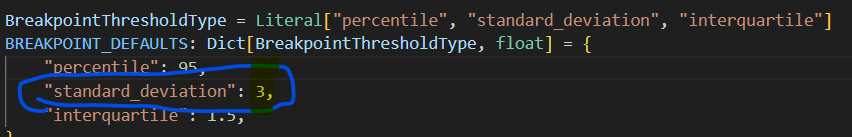

3. 문서 분할

In [83]:
split_docs = text_splitter.split_documents(docs)

print(len(split_docs))

13


In [84]:
print(split_docs[0].page_content)

삼성, 모든 제품에 AI 적용…"구글 등 개방 협업 강화"
삼성전자가 자사 사물인터넷(IoT) 플랫폼 스마트싱스에 인공지능(AI) 기술을 적용하고, 다
른 제품군으로 확대하는 등 홈 AI 기능을 강화한다. 삼성전자는 3일(현지시간) 미국 새너제이 맥에너리 컨벤션 센터에서 '삼성 개발자 콘퍼런
스(이하 SDC) 2024'를 개최했다.


# 6. RecursiveJSONSplitter 
- Json 데이터를 depth-first traversal(깊이 우선 탐색)을 통해 더 작은 JSON 청크를 생성
- 중첩된 JSON 객체를 가능한 유지 
- 하지만, 청크 크기를 min_chunk_size와 max_chunk_size 사이로 유지하기 위해 필요한 경우 객체를 분할
- 값이 중첩된 JSON이 아니라 매우 큰 문자열일 경우 분할되지 않음 
- 청크 크기에 대한 제한이 필요할 경우 해당 분할기 이후 RecursiveTextSplitter로 2차 분할을 하는 게 좋음 
- 분할 기준
    - 텍스트 분할 기준: JSON객체
    - 청크 크기 측정 방식: 문자 수 


1. JSON 파일 갖고오기

In [85]:
import json
import requests

json_data = requests.get("https://api.smith.langchain.com/openapi.json").json()
print(json_data)

{'openapi': '3.1.0', 'info': {'title': 'LangSmith', 'version': '0.1.0'}, 'paths': {'/api/v1/sessions/{session_id}': {'get': {'tags': ['tracer-sessions'], 'summary': 'Read Tracer Session', 'description': 'Get a specific session.', 'operationId': 'read_tracer_session_api_v1_sessions__session_id__get', 'security': [{'API Key': []}, {'Tenant ID': []}, {'Bearer Auth': []}], 'parameters': [{'name': 'session_id', 'in': 'path', 'required': True, 'schema': {'type': 'string', 'format': 'uuid', 'title': 'Session Id'}}, {'name': 'include_stats', 'in': 'query', 'required': False, 'schema': {'type': 'boolean', 'default': False, 'title': 'Include Stats'}}, {'name': 'accept', 'in': 'header', 'required': False, 'schema': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'title': 'Accept'}}], 'responses': {'200': {'description': 'Successful Response', 'content': {'application/json': {'schema': {'$ref': '#/components/schemas/TracerSession'}}}}, '422': {'description': 'Validation Error', 'content': {'appl

2. splitter 객체 생성

In [90]:
from langchain_text_splitters import RecursiveJsonSplitter

json_splitter = RecursiveJsonSplitter(max_chunk_size=300) # <- 글자 수 

## 6.1 JSON으로 split하기 

In [91]:
json_chunks = json_splitter.split_json(json_data=json_data) # <- split_json을 쓰면 value값이 list이 경우, list가 중간에 짤리지 않고 끝까지 가고 chunking 된다. 이때 max_chunk_size로 설정한 값 무시(예외처리)

print(type(json_chunks))
print(len(json_chunks))

<class 'list'>
2219


In [92]:
print(type(json_chunks[0])) # doc 객체가 아닌 dict 값
print(json_chunks[0])

<class 'dict'>
{'openapi': '3.1.0', 'info': {'title': 'LangSmith', 'version': '0.1.0'}, 'paths': {'/api/v1/sessions/{session_id}': {'get': {'tags': ['tracer-sessions'], 'summary': 'Read Tracer Session', 'description': 'Get a specific session.'}}}}


In [93]:
len("""<class 'dict'>
{'openapi': '3.1.0', 'info': {'title': 'LangSmith', 'version': '0.1.0'}, 'paths': {'/api/v1/sessions/{session_id}': {'get': {'tags': ['tracer-sessions'], 'summary': 'Read Tracer Session', 'description': 'Get a specific session.'}}}}
""")

248

- convert_lists=True 옵션 주기

In [ ]:
# json내 list 처리하기 (list를 일반 제이슨으로 변환해서 청킹하게 됨)

json_chunks = json_splitter.split_json(json_data=json_data, convert_lists=True) # convert_lists 는 list를 일반 json으로 인식하게 함. 이렇게 되면 chunk 횟수가 늘어남 (max_chunk_size 예외처리 안해주니까)

print(type(json_chunks))
print(len(json_chunks))

## 6.2 text로 Split하기 

In [94]:
texts = json_splitter.split_text(json_data=json_data)

print(type(texts))
print(len(texts))

<class 'list'>
2219


In [95]:
print(type(texts[0]))

<class 'str'>


## 6.3 Document객체로 split하기 

In [97]:
split_docs = json_splitter.create_documents(texts=[json_data])

print(type(split_docs))
print(len(split_docs))

<class 'list'>
2219


In [98]:
print(type(split_docs[0]))

<class 'langchain_core.documents.base.Document'>


In [99]:
split_docs[0]

Document(page_content='{"openapi": "3.1.0", "info": {"title": "LangSmith", "version": "0.1.0"}, "paths": {"/api/v1/sessions/{session_id}": {"get": {"tags": ["tracer-sessions"], "summary": "Read Tracer Session", "description": "Get a specific session."}}}}')

In [100]:
split_docs[0].page_content

'{"openapi": "3.1.0", "info": {"title": "LangSmith", "version": "0.1.0"}, "paths": {"/api/v1/sessions/{session_id}": {"get": {"tags": ["tracer-sessions"], "summary": "Read Tracer Session", "description": "Get a specific session."}}}}'